<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Medindo a Qualidade de Atributos
    
---

## Conteúdo
- Entropia
    - Entropia para problemas de duas classes
    - Entropia para problemas múltiplas classes
- Entropia de Atributos
- Medidas de Importância
    - Ganho de Informação (*Information Gain*)
    - Taxa de Ganho (*Gain Ratio*)

## Introduçao

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Conjunto de Dados do Titanic**

In [228]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Conjunto de Dados do Titanic**

Qual das variábeis Sex ou Random_Variable dão mais informação sobre o destino do Passageiros (sobrevivente ou não)?

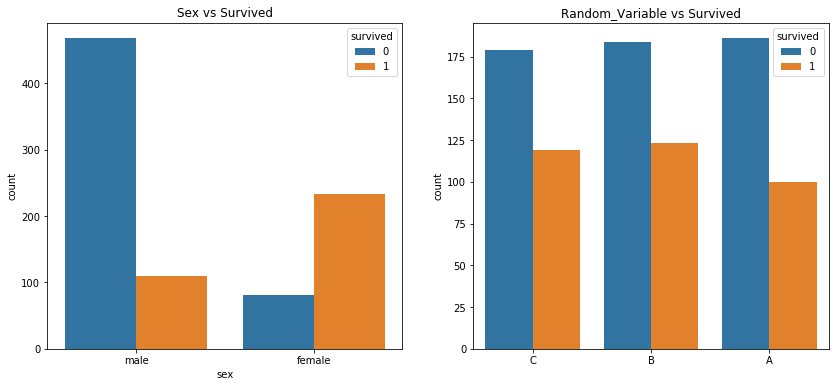

In [229]:
import matplotlib.pyplot as plt
from helper import countplot_sex_random_variable_survived_titanic
fig, ax = countplot_sex_random_variable_survived_titanic()
plt.show()

## Entropia

- A *entropia* em Mineração de Dados mede a *desordem* de um conjunto de dados baseado na distribuição do atributo classe.

- Essa *desordem* diz respeito a quão bem organizados estão os dados em relação à classe. 

- A medida é supervisionada, portanto para medir a *entropia* de um atributo precisamos ter um atributo classe.

### Cálculo de Entropia em um Problema de Duas Clases

- Considere um problema de duas clases em que uma delas é positiva (+) e a outra negativa (-). E um conjunto de dados $X$ que possui dados sobre esse problema.

- A função para medir a entropia é dada por:

$$ E(X) = -\;(\;\;p_+  \log_2{p_+}\;\;+\;\;p_- \times \log_2{p_-}\;\;) $$

- onde, 
    - $p_+$ é a probabilidade de um exemplo ser da classe positiva
    - $p_-$ é a probabilidade de um exemplo ser da classe negativa

### Exemplos
- Vamos imaginar três possíveis conjuntos de dados para $X$
    1. $X_1$ só terá exemplos da classe positiva (+)
    2. $X_2$ só terá exemplos da classe negativa (-)
    3. $X_3$ terá metade dos exemplos da classe positiva e a outra metade da classe negativa

- Como $X_1$ só tem exemplos da classe positiva, então a probabilidade de um exemplo ser:
    - da classe positiva é simplesmente $p_+=1$
    - da classe negativa é $p_-=0$

- A entropia de $X_1$ é:

\begin{array}{lcl} 
E(X)&= & -\;(&p_+ \times \log_2{p_+} & + & p_- \times \log_2{p_-}&)  \\ 
E(X_1)&= & -\;(&1 \times \log_2{1} & + & 0 \times \log_2{0}&)  \\ 
E(X_1)&= & -\;(&1 \times 0 & + & 0 &)  \\ 
E(X_1)&= & -\;(& 0 & + & 0 &)  \\ 
E(X_1)&= & 0
\end{array}

- Uma *entropia* igual a *zero* significa que não há desordem neste conjunto de dados, devido a que todas os exemplos de $X_1$ são da mesma classe.

- O conjunto $X_2$ apenas tem exemplos da classe negativa, então a probabilidade de um exemplo ser:
    - da classe positiva é $p_+=0$
    - da classe negativa é $p_-=1$

- A entropia de $X_2$ é:

\begin{array}{llllll}
E(X)&= & -\;(&p_+ \times \log_2{p_+} & + & p_- \times \log_2{p_-}&)  \\ 
E(X_2)&= & -\;(&0 \times \log_2{0} & + & 1 \times \log_2{1}&)  \\ 
E(X_2)&= & -\;(&0 & + & 1 \times 0&)  \\ 
E(X_2)&= & -\;(& 0 & + & 0 &)  \\ 
E(X_2)&= & 0
\end{array}

- Neste caso, a *desordem* também é zero devido a todos os elementos serem da classe negativa (-)

- Já no conjunto $X_3$ temos exemplos de ambas as classes, e a probabilidade de ser:
    - da classe positiva é $p_+=1/2$ ou $0.5$ ou $2^{-1}$
    - da classe negativa é $p_+=1/2$

- A entropia é: 

\begin{array}{llllll}
E(X)&= & -\;(&p_+ \times \log_2{p_+} & + & p_- \times \log_2{p_-}&)  \\ 
E(X_3)&= & -\;(&0.5 \times \log_2{0.5} & + & 0.5 \times \log_2{0.5}&)  \\ 
E(X_3)&= & -\;(&0.5 \times \log_2{2^{-1}} & + & 0.5 \times \log_2{2^{-1}}&)  \\ 
E(X_3)&= & -\;(&-0.5 \times \log_2{2} & + & - 0.5 \times \log_2{2}&)  \\ 
E(X_3)&= & -\;(&-0.5 \times 1 & + & - 0.5 \times 1&)  \\ 
E(X_3)&= & -\;(&-0.5 & + & -0.5 &)  \\ 
E(X_3)&= & -\;(& - 1 &&&)  \\ 
E(X_3)&= & 1
\end{array}

- No conjunto $X_3$ a *entropia* ou desordem é 1 (máxima)

- Isso indica que em $X_3$ não é possível observar que alguma das classes prevalece nesse conjunto de dados.

- Agora, vamos considerar um conjunto de dados $X_4$ que possui $1/4$ de exemplos da classe positiva e $3/4$ de exemplos da classe negativa.

- Em uma problema de duas classes espera-se que o valor da entropia esteja entre 0 e 1.

\begin{array}{llllll}
E(X)&  = & -\;(&p_+ \times \log_2{p_+}   & + & p_- \times \log_2{p_-}&)  \\ 
E(X_4)&= & -\;(&1/4 \times \log_2{1/4} & + & 3/4 \times \log_2{3/4}&)  \\ 
E(X_4)&= & -\;(&1/4 \times [\log_2{1} - \log_2{4}] & + & 3/4 \times [\log_2{3} - \log_2{4}]&)  \\ 
E(X_4)&= & -\;(&1/4 \times [0 - 2] & + & 3/4 \times [1.58 - 2]&)  \\ 
E(X_4)&= & -\;(&1/4 \times -2 & + & 3/4 \times -0.42&)  \\ 
E(X_4)&= & -\;(&-0.5 & + & -0.32&)  \\ 
E(X_4)&= & -\;(&-0.82 &&& )  \\ 
E(X_4)&= & 0.82  \\ 
\end{array}

### Uma função para cálculo de entropia para duas classes

- Nesta função podemos passar como parâmetro o vetor de probabilidades das classes `vp`.

In [337]:
def entropia (vp):
    somatorio = 0;
    for p in vp :
        somatorio += 0 if (p == 0) else p * np.log2(p)    
    return somatorio * (-1)

In [338]:
print('Entropia X1 -> vp:[1.0 , 0.0]', entropia([1,0]) )
print('Entropia X2 -> vp:[0.0 , 1.0]', entropia([0,1]) )
print('Entropia X3 -> vp:[0.5 , 0.5]', entropia([0.5,0.5]) )
print('Entropia X4 -> vp:[0.25,0.75]', entropia([0.25,0.75]) )

Entropia X1 -> vp:[1.0 , 0.0] -0.0
Entropia X2 -> vp:[0.0 , 1.0] -0.0
Entropia X3 -> vp:[0.5 , 0.5] 1.0
Entropia X4 -> vp:[0.25,0.75] 0.8112781244591328


- Com essa função podemos calcular qual a entropia à medida que a probabilidade da classe positiva aumenta de 5% em 5%.

In [232]:
vp = np.arange(0.0,1.01,0.05)
ventropias = [entropia([ p, 1-p ]) for p in vp]
df_entropia = pd.DataFrame({ 'p.positiva' : vp, 'entropia' : ventropias})
df_entropia.round(4)

,p.positiva,entropia
0,0.00,-0.0000
1,0.05,0.2864
2,0.10,0.4690
3,0.15,0.6098
4,0.20,0.7219
5,0.25,0.8113
6,0.30,0.8813
7,0.35,0.9341
8,0.40,0.9710
9,0.45,0.9928


- Este apresenta o valor de entropia em função da probabilidade da classe positiva

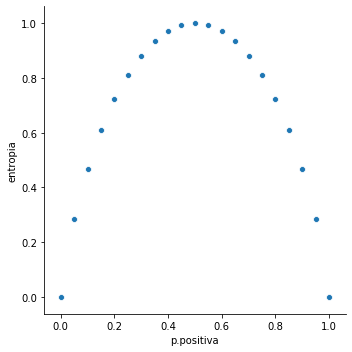

In [350]:
sns.relplot(x = 'p.positiva', y = 'entropia', data = df_entropia)

### Cálculo de Entropia para Problemas de Múltiplas Classes

- Muitos dos problemas que nos enfrentamos atualmente em mineração de dados possuem mais do que duas classes

- A Equação geral para cálculo de entropia de um conjunto de dados é:

$$ E(X) = - \sum_{i}^{c} p_i \times \log_2{p_i} $$

- onde,
    - $c$ é o número de classes do problema.
    - $p_i$ é a probabilidade de um exemplo ser da $i$-ésima classe.

- Note que para $c=2$ a equação é equivalente à de duas classes, definida anteriormente:

\begin{array}{llllll}
E(X) & = & - \sum_{i=1}^{c=2} p_i \times \log_2{p_i} \\ 
E(X) & = & -\;(\;\;p_1 \times \log_2{p_1}\;+\;p_2 \times \log_2{p_2}\;\;)
\end{array}

### Uma Função para Calcular a Entropia do Conjunto para Múltiplas Classes

- Como a entropia de um conjunto de dados depende da coluna de dados do atributo classe. Neste implementação usaremos os valores desse atributo para calcular a entropia, ao invés das probabilidades.

- Assim, primeiro calculamos a frequência de elementos, usando a função Counter que cria uma dicionário com os possíveis valores e a frequência. Depois dividimos a frequência pelo total de valores, obtendo as probabilidades das classes, $P = (p_1, p_2, \dots, p_c)$.

- E após, com $P$ fazemos o calculo de entropia.

In [351]:
def entropia_valores(valores):
    import collections
    counter = collections.Counter(valores)
    vp = [ (n/len(valores)) for n in counter.values() ]    
    return entropia(vp)    

Podemos usar essa função para medir a entropia de qualquer coleção de dados. A seguir uma coleção de dados de uma amostra de atributo classe aleatória com valores 'C1', 'C2' ou 'C3'.

In [257]:
random_class = np.random.choice(a=['C1','C2','C3'], size=10, replace = True)
random_class

array(['C1', 'C3', 'C3', 'C2', 'C2', 'C2', 'C1', 'C3', 'C1', 'C3'],
      dtype='<U2')

In [258]:
entropia_valores(random_class)

1.5709505944546684

**Exercício 1**
- Ordenar o atributo classe `random_class` em ordem crescente.
- Calcule a entropia do atributo classe novamente. Você observou alguma diferença no valor da entropia? Explique a sua resposta. 

**Exercício 2**

- Para este problema de classes `C1`, `C2` e `C3` foi selecionada uma amostra que possui apenas instâncias da classe `C1` e `C3`. Qual é a entropia máxima qeu essa nova amostra pode alcançar? Explique sua resposta.

**Exercício 3**

- Para este problema de classes `C1`, `C2` e `C3` foi selecionada uma amostra que possui apenas instâncias da classe `C2`. Qual é a entropia desse conjunto de dados? Explique sua resposta.

## Entropia de Atributos

- Embora já conseguimos calcular a entropia de um conjunto de dados, baseado na sua classe, ainda precisamos calcular a *desordem* que cada atributo produz no conjunto de dados.

- Um atributo terá uma baixa entropia se os seus valores permitem dividir o conjunto de dados em partes com baixa entropia.

- Assim, para um atributo ter entropia 0 precisará que os valores do atributo dividam o conjunto de dados em partes com apenas uma classe.

- Exemplo:

In [259]:
atributo1 = ['v1','v1','v2','v2','v1','v2']
classe   = ['C1','C1','C2','C2','C1','C2']
df1 = pd.DataFrame({'A1': atributo1, 'classe': classe})
df1

,A1,classe
0,v1,C1
1,v1,C1
2,v2,C2
3,v2,C2
4,v1,C1
5,v2,C2


- Observe o número de exemplos de cada classe para cada valor do atributo.

In [260]:
pd.crosstab(df1.A1, df1.classe)

classe,C1,C2
A1,,
v1,3,0
v2,0,3


- Cada valor de atributo apresenta exemplos de apenas uma classe. Isso significa que os valores desse atributo permitem diferenciar bem as classes do problema.

- Para calcular a entropia de um atributo é necessário calcular a entropia de cada um dos conjuntos de dados gerados pelos seus valores e usar esse valor proporcionalmente ao tamanho de cada conjunto.

- Veja os dois subconjuntos de dados gerados a partir dos valores do atributo `v1` e `v2` do atributo `A1`.

In [261]:
X_v1 = df1.groupby('A1').get_group('v1')
X_v1

,A1,classe
0,v1,C1
1,v1,C1
4,v1,C1


In [262]:
X_v2 = df1.groupby('A1').get_group('v2')
X_v2

,A1,classe
2,v2,C2
3,v2,C2
5,v2,C2


- Seja um atributo $A$ com possíveis valores $v_1, v_2, \ldots, v_m$, o cálculo de Entropia do Atributo $A$ é definido por:

$$ E(X,A) = \sum_{j=1}^{m} \frac{|X_{j}|}{|X|} \times E(X_{j})  $$

- onde,
    - $A$ é um atributo
    - $v$ é cada valor do atributo $A$, sem repetir
    - $X_{j}$ é a partição do conjunto $X$ em que o atributo $A$ possui valor $v_j$
    - $|X_{j}| / |X|$ é a proporção de valores $v_j$ no conjunto de dados
    - $E(X_j)$ é a entropia do conjunto $X_j$

Suponha o atributo definido no exemplo anterior, definido como $A_1$ e sejam `X_1` e `X_2` os subconjuntos de dados para os valores `v1` e `v2` do atributo, respectivamente. Calculamos a entropia do atributo $A_1$ em relação à classe da seguinte forma:

\begin{array}{lllll}
E(X,A) & = & \sum_{j=1}^{m} \frac{|X_{j}|}{|X|} \times E(X_{j})  \\ 
E(X,A_1) & = & \sum_{j=1}^{m=2} \frac{|X_{j}|}{|X|} \times E(X_{j}) \\
E(X,A_1) & = & \frac{|X_{1}|}{|X|} \times E(X_{1}) + \frac{|X_{2}|}{|X|} \times E(X_{2}) \\
E(X,A_1) & = & \frac{3}{6} \times E(X_{1}) + \frac{3}{6} \times E(X_{2}) \\ 
E(X,A_1) & = & \frac{3}{6} \times 0 + \frac{3}{6} \times 0 \\ 
E(X,A_1) & = & 0 \\
\end{array}

- De fato como já tínhamos visto esse atributo divide perfeitamente as classes do conjunto de dados.

**Adicionando um Novo Atributo ao Conjunto**

In [263]:
atributo1 = ['v1','v1','v2','v2','v1','v2']
atributo2 = ['v1','v2','v1','v1','v2','v1']
classe   = ['C1','C1','C2','C2','C1','C2']
df1 = pd.DataFrame({'A1': atributo1, 'A2': atributo2, 'classe': classe})
df1

,A1,A2,classe
0,v1,v1,C1
1,v1,v2,C1
2,v2,v1,C2
3,v2,v1,C2
4,v1,v2,C1
5,v2,v1,C2


- A seguir dos dois subconjuntos de dados gerados a partir dos valores do $A_2$: `v1` e `v2`.

- Observe o número de exemplos de cada classe para cada valor do atributo.

In [264]:
X_v1 = df1.groupby('A2').get_group('v1')
X_v1

,A1,A2,classe
0,v1,v1,C1
2,v2,v1,C2
3,v2,v1,C2
5,v2,v1,C2


In [265]:
X_v2 = df1.groupby('A2').get_group('v2')
X_v2

,A1,A2,classe
1,v1,v2,C1
4,v1,v2,C1


- Podemos observar que esse atributo não divide o conjunto em subconjuntos com apenas uma classe.

- Calculando a entropia do subconjunto $X_1$:

\begin{array}{llllll}
E(X_1) & = & -\;(\;\;p_{C1} \times \log_2{p_{C1}}\;+\;p_{C2} \times \log_2{p_{C2}}\;\;)\\
E(X_1) & = & -\;(\;\;1/4 \times \log_2{1/4}\;+\;3/4 \times \log_2{3/4}\;\;)\\
E(X_1) & = & 0.8113\\
\end{array}

- Calculando a entropia do subconjunto $X_2$:

\begin{array}{llllll}
E(X_2) & = & -\;(\;\;p_{C1} \times \log_2{p_{C1}}\;+\;p_{C2} \times \log_2{p_{C2}}\;\;)\\
E(X_2) & = & -\;(\;\;2/2 \times \log_2{2/2}\;+\;0/2 \times \log_2{0/2}\;\;)\\
E(X_2) & = & 0
\end{array}

Seja $A_2$ o atributo 2 do conjunto de dados. A entropia desse atributo é calculada como segue:

\begin{array}{lllll}
E(X,A_2) & = & \sum_{j=1}^{m} \frac{|X_{j}|}{|X|} \times E(X_{j})  \\ 
E(X,A_2) & = & \sum_{j=1}^{m=2} \frac{|X_{j}|}{|X|} \times E(X_{j}) \\
E(X,A_2) & = & \frac{|X_{1}|}{|X|} \times E(X_{1}) + \frac{|X_{2}|}{|X|} \times E(X_{2}) \\
E(X,A_2) & = & \frac{4}{6} \times E(X_{1}) + \frac{2}{6} \times E(X_{2}) \\ 
E(X,A_2) & = & \frac{4}{6} \times 0.8113 + \frac{2}{6} \times 0 \\ 
E(X,A_2) & = & 0.5409 \\
\end{array}

- Ao analizarmos a entropia dos atributo $A_1$ e $A_2$, observamos que a entropia do atributo $A_1$ é menor do que a do atributo $A_2$. 

- Isso inidica que o fato de conhecer o atributo $A_1$ gera conjuntos de dados com pouca *desordem*.

#### Função para Cálculo da Entropia do Atributo

In [266]:
df1[['A2','classe']]

,A2,classe
0,v1,C1
1,v2,C1
2,v1,C2
3,v1,C2
4,v2,C1
5,v1,C2


In [295]:
def entropia_atributo(X, atributo, classe) :
    somatorio = 0    
    for valor, Xj in X.groupby(atributo):        
        p_Xj = len(Xj) / len(X)        
        E_Xj = entropia_valores(Xj[classe])
        somatorio += p_Xj * E_Xj        
    return somatorio

In [296]:
entropia_atributo(df1, 'A1', 'classe')

0.0

In [297]:
entropia_atributo(df1, 'A2', 'classe')

0.5408520829727552

In [298]:
def entropia_atributo_detalhes(X, atributo, classe) :
    somatorio = 0
    detalhes = pd.DataFrame(columns = ['valor','prop_Xj'])
    for valor, Xj in X.groupby(atributo):        
        p_Xj = len(Xj) / len(X)        
        E_Xj = entropia_valores(Xj[classe])
        somatorio += p_Xj * E_Xj
        detalhes = detalhes.append({'valor' : valor, 'prop_Xj' : p_Xj, 'E(Xj)' : E_Xj }, 1)
    return somatorio, detalhes

In [299]:
E_A1, detalhes = entropia_atributo_detalhes(df1, 'A1', 'classe')
detalhes

,valor,prop_Xj,E(Xj)
0,v1,0.5,-0.0
1,v2,0.5,-0.0


In [300]:
E_A2, detalhes = entropia_atributo_detalhes(df1, 'A2', 'classe')
detalhes

,valor,prop_Xj,E(Xj)
0,v1,0.666667,0.811278
1,v2,0.333333,-0.000000


## Medidas de Importância

### Ganho de Informação (*Information Gain*)

- O Ganho de Informação (IG) de um atrbiuto consiste diferença entre a entropia inicial do conjunto de dados $X$ e a entropia ao utilizar o atributo $A$.

- Equação:

$$ IG = E(X) - E(X,A)$$

- O IG quantifica a redução de entropia esperada por conhecer os valores do atributo A no conjunto X.

In [301]:
def ganho_de_informacao(X,atributo,classe) :
    E_X = entropia_valores(X[classe])
    E_X_A = entropia_atributo(X,atributo,classe)
    return  E_X - E_X_A

In [302]:
ganho_de_informacao(df1, 'A1', 'classe')

1.0

In [303]:
ganho_de_informacao(df1, 'A2', 'classe')

0.4591479170272448

#### O problema do Ganho de Informação e da Entropia:
- Ela é enviesada ou tendenciosa (*baised*) com atributos que possuem muitos valores possíveis.
- Por exemplo, um atributo de ID (como o AnimalID no dataset Shelter Animals), que divide o conjunto de dados em 1 exemplo por partição $X_j$.
- Assim, embora tenhamos muitas partições $X_j$, todas as partições apresentam um único exemplo (de uma classe), consequentemente, entropia baixa.
- A soma dessa entropias irão fazer com que $E(X,A) = 0$, o que maximiza o $IG$.
- No entanto, o atributo de identificação não deve ser um bom atributo para predição.

### Taxa de Ganho (*Gain Ratio*)

- A Taxa de Ganho de um atrbiuto consiste na razão entre o ganho de informação e a informação intrínseca do atributo que vai dividir o conjunto de dados.

- A informação intrínseca (*Intrinsic Information* - I) nada mais é do que a entropia do atributo, sem usar informação da classe.

- Equação:

$$ GainRatio(X,A) = \frac{IG(X,A)}{I(A)} = \frac{IG(X,A)}{E(A)}$$

- onde,
    - $IG(X,A)$ é o ganho de informação do atributo $A$ no conjunto $X$
    - $E(A)$ é a entropia (*cuidado*: não é $E(X,A)$ )

#### Implementação da Função

In [311]:
def razao_de_ganho (X, atributo, classe):
    IG = ganho_de_informacao(X, atributo, classe)
    I = entropia_valores(X[atributo])
    return IG / I
    

#### Exemplo: Ganho de Informação *vs* Razão de Ganho
-  Vamos adicionar um novo atributo chamado **ID**, único para cada registro.

In [336]:
atributoID = ['1','2','3','4','5','6']
atributo1 = ['v1','v1','v2','v2','v1','v2']
atributo2 = ['v1','v2','v1','v1','v2','v1']
classe   = ['C1','C1','C2','C2','C1','C2']
df2 = pd.DataFrame({'ID': atributoID, 'A1': atributo1, 'A2': atributo2, 'classe': classe})
df2

,ID,A1,A2,classe
0,1,v1,v1,C1
1,2,v1,v2,C1
2,3,v2,v1,C2
3,4,v2,v1,C2
4,5,v1,v2,C1
5,6,v2,v1,C2


In [335]:
pd.DataFrame({ 
    'InformationGain': 
        df2.drop(['classe'],1).apply(
            lambda x : ganho_de_informacao(df2,x.name,'classe'),0),
    'GainRatio':
        df2.drop(['classe'],1).apply(
            lambda x : razao_de_ganho(df2,x.name,'classe'),0) 
})

,InformationGain,GainRatio
ID,1.000000,0.386853
A1,1.000000,1.000000
A2,0.459148,0.500000


### Considerações Finais

- As duas medidas, em geral, retornam bons resultados, pois não é comum usar atributos como o ID para fazer predições

- O ganho de informação é tendencioso com atributos com muitos valores possíveis

- A taxa de ganho tende a favorecer atributos com menos valores possíveis e mais *balanceados*.